## Food Establishments
“This set locates establishments under the responsibility of the Food Inspection Division 
of the City of Montreal. It should be noted that the City is mandated by the Ministère de l'Agriculture, 
des Pêcheries et de l'Alimentation du Québec (MAPAQ) with respect to inspections on its territory.” 

The data is provided as shape, csv and geojson. For the analysis the shape data is used. 

### Steps that are taken
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.montreal.ca/dataset/etablissements-alimentaires
- Source: City of Montréal, Open Data Portal Montreal
- Publisher: Environment Service - Food Inspection Division
- Accessed: 12.11.2023

In [1]:
# Import necessary libraries
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

NameError: name 'os' is not defined

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/work/Food_establishment


In [4]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [5]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

In [6]:
# Construct the full path to the files we want to read
# and read the files using GeoPandas
# Load the shapefile containing business data
file_path = os.path.join(folder_path, "Food_establishments/businesses.shp")
food_establishments = gpd.read_file(file_path)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [7]:
# Check the shape (number of rows and columns) of the data
food_establishments.shape

(26646, 13)

In [8]:
# Display the first few rows of the business data
food_establishments.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990)
1,135,PROVI-TOT,9128 Boulevard Perras,Montréal,"Québec, Canada",Épicerie avec préparation,Fermé changement d'exploitant,20090821,45.650352,-73.577726,298741.88,5056720.54,POINT (298741.880 5056720.540)
2,138,LE PETIT TABLIER,690 Rue Sherbrooke Ouest,Montréal,"Québec, Canada",Restaurant,Fermé changement d'exploitant,20090306,45.504673,-73.57376600000001,299035.65,5040530.65,POINT (299035.650 5040530.650)
3,140,RESTO-PUB MARCO POLO,7985 Avenue Marco-Polo,Montréal,"Québec, Canada",Brasserie,Fermé,20230914,45.62598,-73.583592,298281.88,5054012.39,POINT (298281.880 5054012.390)
4,146,BISTRO OLA KALA,522 Rue Jarry Ouest,Montréal,"Québec, Canada","Bar salon, taverne",Fermé changement d'exploitant,20120921,45.531975,-73.635054,294251.47,5043570.93,POINT (294251.470 5043570.930)


In [9]:
# Get unique values in the 'type' column to explore business categories
selected_column = "type"
categories = food_establishments[selected_column].unique()
print(categories)

['Distributrice automatique' 'Épicerie avec préparation' 'Restaurant'
 'Brasserie' 'Bar salon, taverne' 'Restaurant service rapide'
 'Supermarché' 'Garderie' 'Magasin à rayons' "Centre d'accueil" 'Épicerie'
 "Cafétéria institution d'enseignement" 'Boucherie-épicerie' 'Cafétéria'
 'Casse-croûte' 'Résidence de personnes âgées' 'Boulangerie'
 "Organisme d'aide alimentaire" 'Restaurant mets pour emporter'
 'École/mesures alimentaires' 'Bar laitier saisonnier' 'Poissonnerie'
 'Charcuterie/fromage' 'Pâtisserie' 'Confiserie/chocolaterie' 'Boucherie'
 'Aliments naturels' 'Traiteur' 'Autres' 'Entrepôt' 'Kiosque' 'Hôpital'
 'Événements spéciaux' 'Charcuterie' 'Pâtisserie-dépôt' 'Bar laitier'
 'Cuisine domestique' 'Local de préparation' 'Usine produit autre'
 'Usine de produits marins' 'Marché public'
 'Distributeur en gros de produits mixtes' 'Vendeur itinérant'
 'Entrepôt de produits mixtes' 'Entrepôt de produits végétaux'
 'Distributeur en gros de produits laitiers'
 'Camp de vacances / Auberg

In [10]:
# Get the counts of each unique value in the 'type' column
counts = food_establishments['type'].value_counts()
print(counts)

type
Restaurant                                            7086
Épicerie                                              2903
Restaurant service rapide                             2552
Épicerie avec préparation                             1669
Casse-croûte                                          1363
                                                      ... 
Découpe à forfait                                        1
Atelier de conditionnement de produits de la pêche       1
Camp de vacances / Auberge jeunesse / Gîte               1
Site d'eau vendue au volume                              1
Cabane à sucre                                           1
Name: count, Length: 73, dtype: int64


In [11]:
# Get the counts of each unique value in the 'statut' column (status of businesses)
counts2 = food_establishments['statut'].value_counts()
print(counts2)

statut
Fermé changement d'exploitant    10684
Fermé                            10350
Ouvert                            5493
Sous inspection fédérale           114
En traitement                        5
Name: count, dtype: int64


In [12]:
# Convert the counts of 'type' to a DataFrame for better readability
counts = food_establishments['type'].value_counts().reset_index()
counts.columns = ['Type', 'Count']
print(counts)

                                                 Type  Count
0                                          Restaurant   7086
1                                            Épicerie   2903
2                           Restaurant service rapide   2552
3                           Épicerie avec préparation   1669
4                                        Casse-croûte   1363
..                                                ...    ...
68                                  Découpe à forfait      1
69  Atelier de conditionnement de produits de la p...      1
70         Camp de vacances / Auberge jeunesse / Gîte      1
71                        Site d'eau vendue au volume      1
72                                     Cabane à sucre      1

[73 rows x 2 columns]


In [13]:
# df_active = food_establishments[food_establishments['statut'] == 'Ouvert']
# df_inactive = food_establishments[(food_establishments['statut'] == 'Fermé') | (food_establishments['statut'] == "Fermé changement d'exploitant")]

In [14]:
df_inactive = food_establishments[food_establishments['statut'] == 'Fermé']
df_active = food_establishments[food_establishments['statut'].isin(["Ouvert", "Fermé changement d'exploitant", "En traitement", "Sous inspection fédérale"])]

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990)
1,135,PROVI-TOT,9128 Boulevard Perras,Montréal,"Québec, Canada",Épicerie avec préparation,Fermé changement d'exploitant,20090821,45.650352,-73.577726,298741.88,5056720.54,POINT (298741.880 5056720.540)
2,138,LE PETIT TABLIER,690 Rue Sherbrooke Ouest,Montréal,"Québec, Canada",Restaurant,Fermé changement d'exploitant,20090306,45.504673,-73.57376600000001,299035.65,5040530.65,POINT (299035.650 5040530.650)


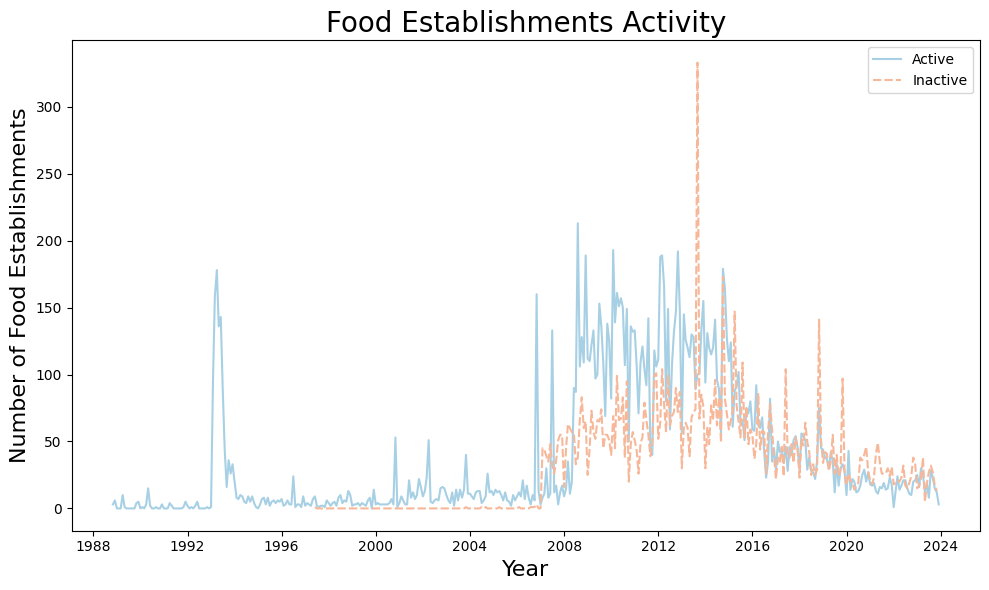

In [15]:
# Convert 'date_statu' column to datetime format
df_active['date_statu'] = pd.to_datetime(df_active['date_statu'])
df_inactive['date_statu'] = pd.to_datetime(df_inactive['date_statu'])

# Resample data by month to create a time series
time_series_active = df_active.set_index('date_statu').resample('M').size()
time_series_inactive = df_inactive.set_index('date_statu').resample('M').size()

# Combine the active and inactive time series into a single DataFrame
time_series_data = pd.DataFrame({
    'Active': time_series_active,
    'Inactive': time_series_inactive
})

# Plot the time series of active and inactive businesses
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series_data, palette='RdBu_r')
plt.title('Food Establishments Activity', size=20)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Food Establishments', size=16)

# Save the figure in the "Figures" folder and show the plot
plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_establishments_activity_over_time.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()